# Convolutional Neural Networks ( CNNs )
A CNN (Convolutional Neural Network) is a type of deep learning model that is really good at looking at pictures and understanding what's inside them.

- You can think of it like a robot brain that learns to see and recognize images, such as:
- Is this a cat or a dog?
- Where is the face in the photo?

CNN is made of 3 main parts:
Part	Easy Explanation
1. Convolution	Looks at small parts of the image and finds patterns (like edges, circles)
2. Pooling	Shrinks the image to keep only the most important parts
3. Fully Connected Layer	Makes the final decision (like: "Yes, this is a cat")

In [1]:
# Importing Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, models
from tensorflow.keras.datasets import fashion_mnist


## 1. Test and Train Split

In [2]:
# setting it at 42 makes your code predictable by keeping the random parts the same every time you run it.
tf.random.set_seed(42)


In [3]:
# Loading our dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
# Checking the shapes of our training and testing dataset
print("Training Data Shape: ", X_train.shape)
print("Training Data Labels: ", y_train.shape)
print("Test Data Shape: ", X_test.shape)
print("Testing Data Labels: ", y_test.shape)

# The images are on grayscale as they have channel 1

Training Data Shape:  (60000, 28, 28)
Training Data Labels:  (60000,)
Test Data Shape:  (10000, 28, 28)
Testing Data Labels:  (10000,)


## 2. Visualization Of Images

In [5]:
# First of all we will define the class names for labels
labels = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat','Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']


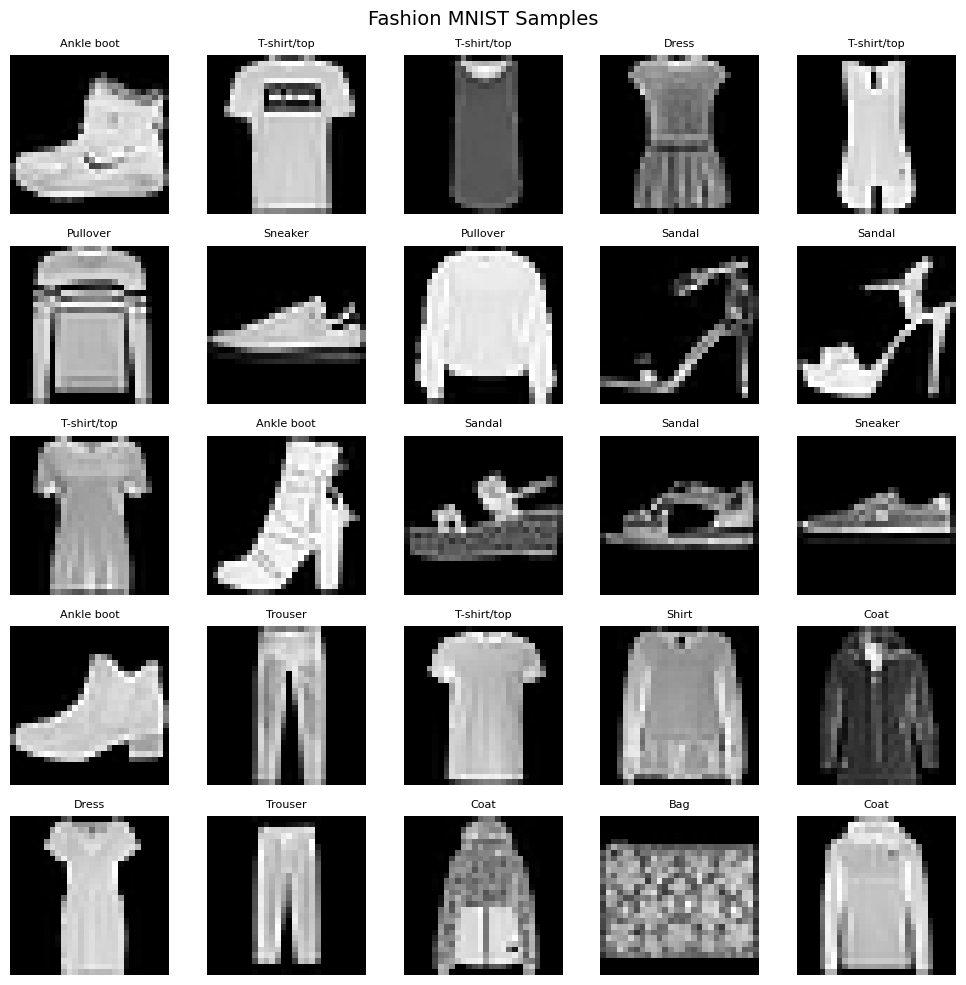

In [6]:
# Now Visualizing our dataset
# Plot 25 images from the training set
# Deciding the size foe our plot
plt.figure(figsize=(10, 10))

# plt.imshow(X_train[i], cmap='gray')- Shows i-th image from training set X_train in black-and-white (cmap='gray').
# y_train[i] gives the number (like 0, 2, etc.). labels[...] converts that number into a word.
# plt.axis('off') - This hides the x and y axes (the number lines around the image) — makes it cleaner.
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(labels[y_train[i]], fontsize=8)
    plt.axis('off')

# plt.tight_layout(): Fixes spacing so images don’t overlap.
plt.suptitle("Fashion MNIST Samples", fontsize=14)
plt.tight_layout()
plt.show()


## 3. Normalization of Pixel Values

In [7]:
# By default, the image data might be in integers (like 0, 255), so we convert it to floats.
# .astype("float32") - This changes the pixel values to a special number format called float32
# Dividing by 255.0 changes the pixel values to be between 0 and 1.
X_test = X_test.astype('float32') / 255.0
X_train = X_train.astype('float32') / 255.0


## 4. Adding Channel Dimension

In [8]:
# Checking shape
print(X_train.shape)
print(X_test. shape)

# We see nochannel diension for grayscale so we will add ourselves

(60000, 28, 28)
(10000, 28, 28)


In [9]:
# Reshaping the training and testing data to add channel dimension
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [10]:
# Checking the added channel dimension
print(X_train.shape)
print(X_test. shape)

# Channel has been added

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 5. Building CNN Model

In [11]:
# Creating a cnn model
model = models.Sequential([
    # Step 1: Define input shape - images are 28x28 pixels with 1 color channel (grayscale) in our dataset.
    Input(shape=(28, 28, 1)),

    # Step 2: First convolution layer - finds simple patterns (like edges), uses 32 filters of size 3x3, 'relu' helps model learn better
    layers.Conv2D(32, (3, 3), activation='relu'),

    # Step 3: Max pooling - reduces image size by taking the biggest value in 2x2 blocks, helps make the model faster and focus on important features
    layers.MaxPooling2D(2, 2),

    # Step 4: Second convolution layer - finds more complex patterns with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Step 5: Another max pooling layer to reduce size again
    layers.MaxPooling2D(2, 2),

    # Step 6: Flatten - turn the 2D data into 1D, so it can be used by fully connected layers
    layers.Flatten(),

    # Step 7: Fully connected layer with 128 neurons, 'relu' activation helps learn complex relationships.
    layers.Dense(128, activation='relu'),

    # Step 8: Dropout - randomly turns off 30% of neurons during training to prevent overfitting (helps the model generalize better)
    layers.Dropout(0.3),

    # Step 9: Output layer with 10 neurons (for 10 classes), 'softmax' turns output into probabilities for each class
    layers.Dense(10, activation='softmax')
])


## 6. Compiling Model

In [12]:
# Compiling the Model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


## 7. Model Summary

In [13]:
# Checking Model Summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 8. Training Model

In [14]:
# Training our model
history = model.fit(X_train, y_train, epochs = 10,
                    batch_size = 64, validation_data = (X_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.7349 - loss: 0.7409 - val_accuracy: 0.8661 - val_loss: 0.3686
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.8644 - loss: 0.3718 - val_accuracy: 0.8798 - val_loss: 0.3334
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.8832 - loss: 0.3212 - val_accuracy: 0.8938 - val_loss: 0.2954
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.8956 - loss: 0.2839 - val_accuracy: 0.8999 - val_loss: 0.2753
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9025 - loss: 0.2610 - val_accuracy: 0.9020 - val_loss: 0.2588
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.9121 - loss: 0.2383 - val_accuracy: 0.9036 - val_loss: 0.2585
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9176 - loss: 0.2209 - val_accuracy: 0.9075 - val_loss: 0.2534
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9227 - loss: 0.2063 - 

## 9. Accuracy and Loss Plots

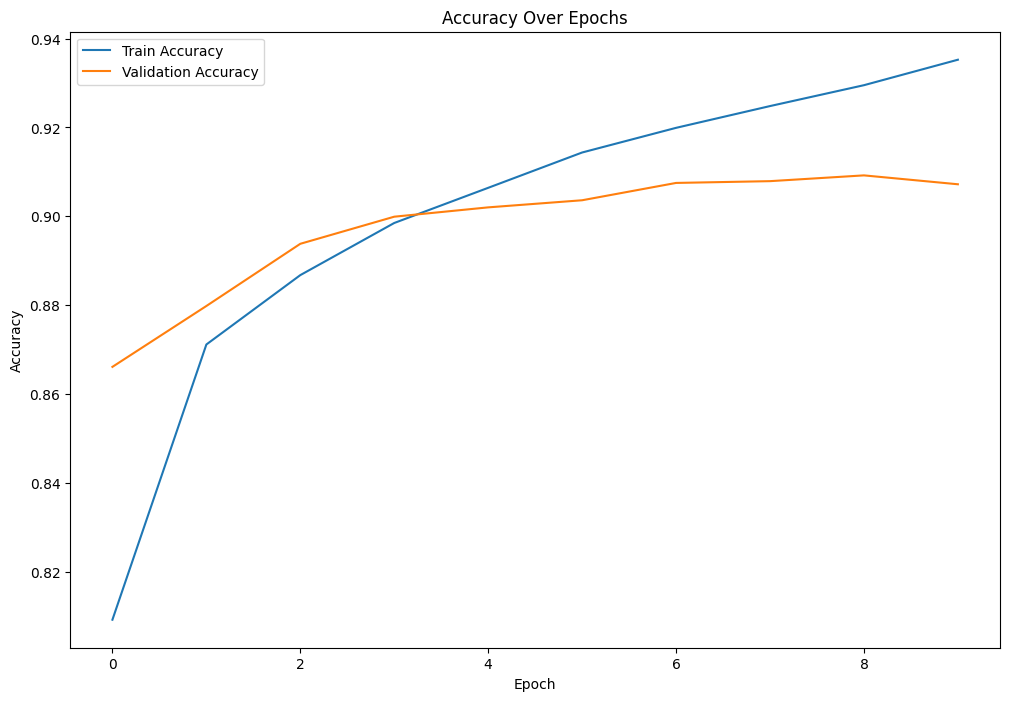

In [21]:
# Selecting the size for the plot
plt.figure(figsize = (12, 8))

# Making the accuracy plot
plt.plot(history.history['accuracy'], label= "Train Accuracy")
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Showing both plots
plt.show()


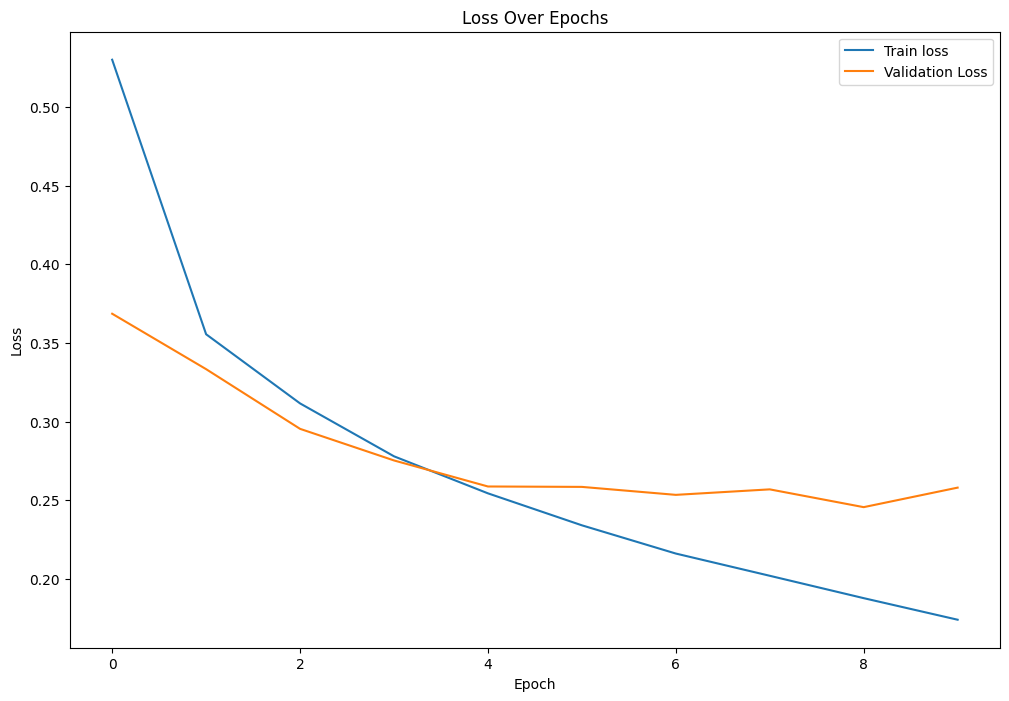

In [22]:
# Selecting the size for the plot
plt.figure(figsize = (12, 8))

# Makaing plot for loss
plt.plot(history.history['loss'], label= "Train loss")
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Showing both plots
plt.show()


## 10. Model Evaluation

In [17]:
# Checking Test Accuracy and Loss
test_accuracy, test_loss = model.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9076 - loss: 0.2681


In [18]:
# Printing
print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)


Test Accuracy:  0.2580471336841583
Test Loss:  0.9071999788284302


## 11. Prediction

In [19]:
# We will predict the first 10 samples
predictions = model.predict(X_test[:10])

# For each image, picking the class with the highest prediction score, and saving it as the predicted label.
predicted_labels = np.argmax(predictions, axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


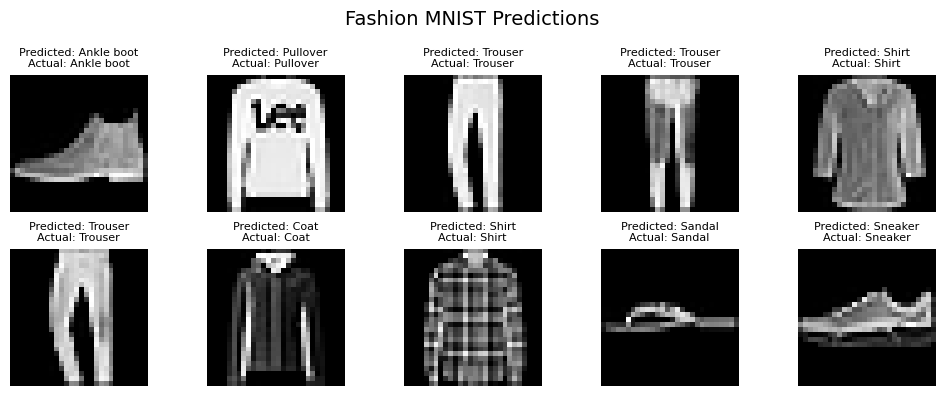

In [23]:
# Deciding size of plot
plt.figure(figsize=(10, 4))

# Using loop for displaying predictions
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_test[i].squeeze(), cmap='gray')
  plt.title(f"Predicted: {labels[predicted_labels[i]]}\nActual: {labels[y_test[i]]}", fontsize = 8)
  plt.axis('off')

# Decising the title
plt.suptitle("Fashion MNIST Predictions", fontsize=14)

# showing the plot
plt.tight_layout()
plt.show()
